In [63]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set_style('dark')

ao_m_13=pd.read_csv('AusOpen-men-2013.csv')

Q. Who among the men won the Australian Open in 2013? Was he consistent with his strong serve or good shots throughout the tournament? Did his strong serve or good shots contribute more to his win?

In [64]:
if ao_m_13.loc[125, 'Result']==0:
    print(ao_m_13.loc[125, 'Player2'], "is the 2013 Australian Open champion.")
elif ao_m_13.loc[125, 'Result']==1:
    print(ao_m_13.loc[125, 'Player1'], "is the 2013 Australian Open champion.")

Stanislas Wawrinka is the 2013 Australian Open champion.


In [65]:
df=ao_m_13[(ao_m_13['Player1']=='Stanislas Wawrinka') | (ao_m_13['Player2']=='Stanislas Wawrinka')][['Player1', 'Player2', 'Round', 'ACE.1', 'WNR.1', 'NPW.1', 'FNL1', 'ACE.2', 'WNR.2', 'NPW.2', 'ST1.1', 'ST2.1', 'ST3.1', 'ST4.1', 'ST5.1', 'FNL2']]
display(df)

,Player1,Player2,Round,ACE.1,WNR.1,NPW.1,FNL1,ACE.2,WNR.2,NPW.2,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FNL2
15,Stanislas Wawrinka,Andrey Golubev,1,4,23,13.0,2,0,8,6.0,6,4.0,NaN,NaN,NaN,0
71,Stanislas Wawrinka,Alejandro Falla,2,9,61,23.0,3,1,26,24.0,6,6.0,6.0,6.0,NaN,1
112,Stanislas Wawrinka,Tommy Robredo,4,14,57,17.0,3,1,24,13.0,6,7.0,7.0,NaN,NaN,0
119,Stanislas Wawrinka,Novak Djokovic,5,17,51,20.0,3,7,45,26.0,2,6.0,6.0,3.0,9.0,2
123,Tomas Berdych,Stanislas Wawrinka,6,21,60,23.0,1,18,57,14.0,3,7.0,6.0,6.0,NaN,3
125,Rafael Nadal,Stanislas Wawrinka,7,1,19,5.0,1,19,53,11.0,3,2.0,6.0,3.0,NaN,3


In [66]:
import math
lis=[]

df1=pd.DataFrame(columns=['Number of aces', 'Number of winners', 'Number of sets', 'Margin of win'])

for index, row in df.iterrows():
    if row['Player1']=='Stanislas Wawrinka':
        lis=[row['ST1.1'], row['ST2.1'], row['ST3.1'], row['ST4.1'], row['ST5.1']]
        s=pd.Series([row['ACE.1'], row['WNR.1'], sum(not math.isnan(x) for x in lis), row['FNL1']-row['FNL2']], index=['Number of aces', 'Number of winners', 'Number of sets', 'Margin of win'])
        df1=pd.concat([df1, s.to_frame().T], ignore_index=True)        
    elif row['Player2']=='Stanislas Wawrinka':
        lis=[row['ST1.1'], row['ST2.1'], row['ST3.1'], row['ST4.1'], row['ST5.1']]
        s=pd.Series([row['ACE.2'], row['WNR.2'], sum(not math.isnan(x) for x in lis), row['FNL2']-row['FNL1']], index=['Number of aces', 'Number of winners', 'Number of sets', 'Margin of win'])
        df1=pd.concat([df1, s.to_frame().T], ignore_index=True)

df1

,Number of aces,Number of winners,Number of sets,Margin of win
0,4,23,2,2
1,9,61,4,2
2,14,57,3,3
3,17,51,5,1
4,18,57,4,2
5,19,53,4,2


The dataframe above shows the number of each parameter for each round that Stanislas Wawrinka played.

In [67]:
df1['Aces per set']=df1['Number of aces']/df1['Number of sets']
df1['Winners per set']=df1['Number of winners']/df1['Number of sets']
df1

,Number of aces,Number of winners,Number of sets,Margin of win,Aces per set,Winners per set
0,4,23,2,2,2.0,11.5
1,9,61,4,2,2.25,15.25
2,14,57,3,3,4.666667,19.0
3,17,51,5,1,3.4,10.2
4,18,57,4,2,4.5,14.25
5,19,53,4,2,4.75,13.25


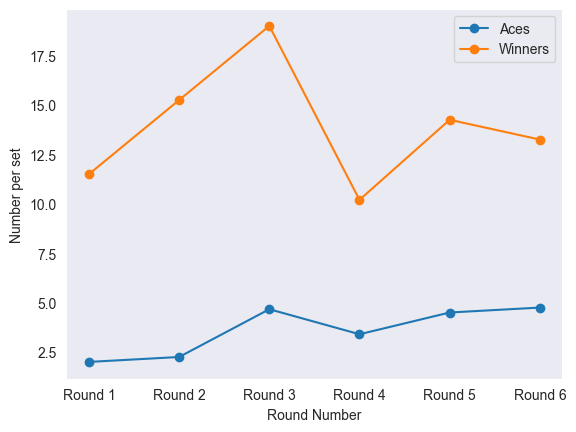

In [74]:
fig, ax = plt.subplots()
labels=['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 6']
ax.plot(labels, df1['Aces per set'], 'o-', label='Aces')
ax.plot(labels, df1['Winners per set'], 'o-', label='Winners')
ax.legend()
plt.xlabel('Round Number')
plt.ylabel('Number per set')
plt.show()

In [69]:
df2=df1[['Number of aces', 'Number of winners', 'Margin of win']]

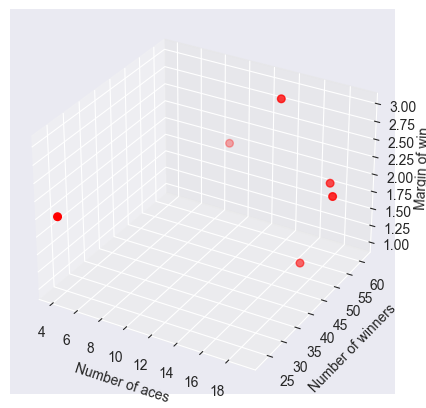

In [72]:
fig=plt.figure(figsize=(15, 5))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df2['Number of aces'], df2['Number of winners'], df2['Margin of win'], c='r', s=30)
ax.set_xlabel('Number of aces')
ax.set_ylabel('Number of winners')
ax.set_zlabel('Margin of win')
ax.zaxis.labelpad=1

In [70]:
X=df2[['Number of aces', 'Number of winners']]
y=df2['Margin of win']

model = LinearRegression()
model.fit(X, y)
y_pred=model.predict(X)
df2['Predicted margin']=y_pred
display(df2)

C:\Users\hardi\AppData\Local\Temp\ipykernel_8828\1541183839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Predicted margin']=y_pred


,Number of aces,Number of winners,Margin of win,Predicted margin
0,4,23,2,1.920783
1,9,61,2,2.405179
2,14,57,3,2.102182
3,17,51,1,1.852894
4,18,57,2,1.919777
5,19,53,2,1.799186


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


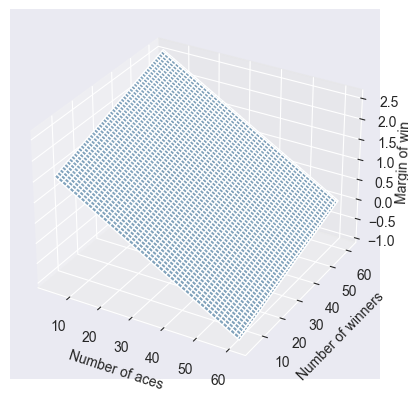

In [71]:
x_vals = np.linspace(min(X['Number of aces']), max(X['Number of winners']), 100)
y_vals = np.linspace(min(X['Number of aces']), max(X['Number of winners']), 100)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)

z_vals = model.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()])
z_mesh = z_vals.reshape(x_mesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.5)
ax.set_xlabel('Number of aces')
ax.set_ylabel('Number of winners')
ax.set_zlabel('Margin of win')
ax.zaxis.labelpad=-1
plt.show()

In [73]:
coefficients = model.coef_
print(coefficients)

[-0.04560131  0.01874743]
